In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
def missing_values_with_percent():
    missing_values = df.isna().sum()
    percentage = (missing_values / len(df) * 100).round(2).astype(str) + '%'
    return pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage})

In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.0%
Year,528,3.4%
Duration,8269,53.32%
Genre,1877,12.1%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [ ]:
df.isnull().sum(axis=1).sort_values(ascending=False)

1920     9
1836     9
3807     9
8669     9
9600     9
        ..
7385     0
7383     0
7380     0
7377     0
15508    0
Length: 15509, dtype: int64

In [ ]:
df.drop(['Actor 2', 'Actor 3'], axis=1, inplace=True)

In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.0%
Year,528,3.4%
Duration,8269,53.32%
Genre,1877,12.1%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%


In [ ]:
df.dropna(subset=['Duration'],inplace=True)

In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.0%
Year,125,1.73%
Duration,0,0.0%
Genre,187,2.58%
Rating,1389,19.19%
Votes,1389,19.19%
Director,14,0.19%
Actor 1,264,3.65%


In [ ]:
threshold = 5
df = df[df.isnull().sum(axis=1) <= threshold]

In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.0%
Year,125,1.73%
Duration,0,0.0%
Genre,187,2.58%
Rating,1389,19.19%
Votes,1389,19.19%
Director,14,0.19%
Actor 1,264,3.65%


In [ ]:
df.Director.describe()

count             7226
unique            3343
top       David Dhawan
freq                41
Name: Director, dtype: object

In [ ]:
df.groupby('Director').Director.count().sort_values(ascending=False)

Director
David Dhawan              41
Mahesh Bhatt              39
Ram Gopal Varma           34
Shakti Samanta            34
Hrishikesh Mukherjee      33
                          ..
Kathir                     1
Kaushik Roy                1
Kaustav Narayan Niyogi     1
Kedar Nath Agarwala        1
Zunaid Memon               1
Name: Director, Length: 3343, dtype: int64

In [ ]:
df['Director'].fillna('David Dhawan',inplace=True)

In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.0%
Year,125,1.73%
Duration,0,0.0%
Genre,187,2.58%
Rating,1389,19.19%
Votes,1389,19.19%
Director,0,0.0%
Actor 1,264,3.65%


In [ ]:
df.groupby('Genre').Genre.count().sort_values(ascending=False)

Genre
Drama                           1176
Drama, Romance                   353
Action, Crime, Drama             343
Action                           262
Comedy                           237
                                ... 
Comedy, Crime, Family              1
Action, Crime, Sci-Fi              1
Comedy, Action                     1
Biography, History, Thriller       1
Action, Drama, News                1
Name: Genre, Length: 428, dtype: int64

In [ ]:
df['Genre'].fillna('Drama',inplace=True)

In [ ]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.0%
Year,125,1.73%
Duration,0,0.0%
Genre,0,0.0%
Rating,1389,19.19%
Votes,1389,19.19%
Director,0,0.0%
Actor 1,264,3.65%


In [ ]:
df.dropna(subset=['Rating','Votes'],inplace=True)
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.0%
Year,0,0.0%
Duration,0,0.0%
Genre,0,0.0%
Rating,0,0.0%
Votes,0,0.0%
Director,0,0.0%
Actor 1,75,1.28%


In [ ]:
df['Actor 1'].describe()

count                 5776
unique                2046
top       Amitabh Bachchan
freq                   104
Name: Actor 1, dtype: object

In [ ]:
df['Actor 1'].fillna('Amitabh Bachchan', inplace=True)
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.0%
Year,0,0.0%
Duration,0,0.0%
Genre,0,0.0%
Rating,0,0.0%
Votes,0,0.0%
Director,0,0.0%
Actor 1,0,0.0%


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [ ]:
df.shape

(5851, 8)

In [ ]:
df['Year'] = df['Year'].astype(str).str.replace('(', '').str.replace(')', '')

<ipython-input-184-6cbb3bddc7f8>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

In [ ]:
genre = df['Genre']
genre.head(5)

1                        Drama
3              Comedy, Romance
5       Comedy, Drama, Musical
6          Drama, Romance, War
8    Horror, Mystery, Thriller
Name: Genre, dtype: object

In [ ]:
genres = df['Genre'].str.split(', ', expand=True)
genres.head(5)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [ ]:
def count_genre_occurrences(genres):
    genre_counts = {}
    for genre in genres.values.flatten():
        if genre is not None:
            genre_counts[genre] = genre_counts.get(genre, 0) + 1

    return {genre: count for genre, count in sorted(genre_counts.items())}

genre_counts = count_genre_occurrences(genres)
for genre, count in genre_counts.items():
    print(f"{genre}: {count}")

Action: 1699
Adventure: 284
Animation: 56
Biography: 126
Comedy: 1352
Crime: 878
Documentary: 130
Drama: 3878
Family: 428
Fantasy: 148
History: 103
Horror: 205
Music: 55
Musical: 416
Mystery: 308
News: 2
Romance: 1383
Sci-Fi: 35
Sport: 44
Thriller: 684
War: 34
Western: 2


In [ ]:
genresPie = df['Genre'].value_counts()
genresPie.head(5)

Drama                   901
Drama, Romance          334
Action, Crime, Drama    329
Action, Drama           207
Comedy, Drama           206
Name: Genre, dtype: int64

In [ ]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})
genrePie.head(5)

,Genre,Count
0,Drama,901
1,"Drama, Romance",334
2,"Action, Crime, Drama",329
3,"Action, Drama",207
4,"Comedy, Drama",206


Top 10 directors

In [ ]:
director = df.dropna(axis=0, subset=['Director'])
dfg = director['Director'].value_counts().head(20)
fig = px.bar(dfg)
fig.show()

Finding out actor with most movies

In [ ]:
actor = df.dropna(axis=0, subset=['Actor 1'])
act = actor['Actor 1'].value_counts().head(20)
fig = px.bar(act)
fig.show()

Overall Top 5 Ratings Given

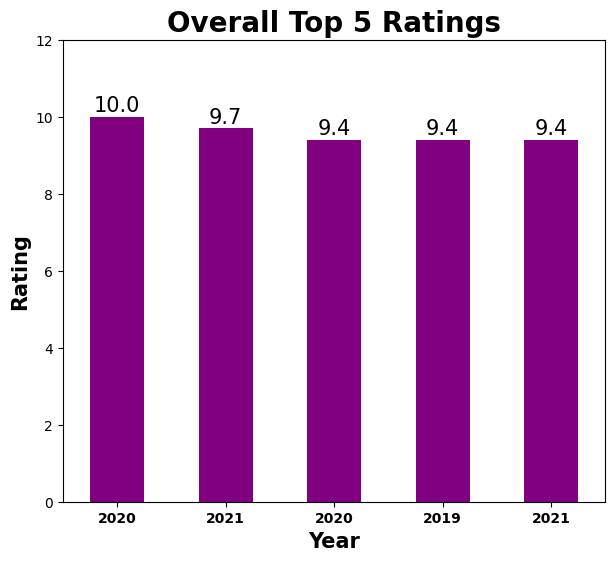

In [ ]:
top5_rating = df[['Year', 'Rating']].sort_values(by='Rating', ascending=False).head()
top5_rating.set_index('Year', inplace=True)

# Plotting Bar Graph
ax = top5_rating.plot(kind='bar', color='purple', legend=None, figsize=(7, 6))

ax.set_xlabel("Year", fontsize=15, fontweight='bold')
ax.set_ylabel("Rating", fontsize=15, fontweight='bold')
ax.set_title("Overall Top 5 Ratings", fontsize=20, fontweight='bold')

ax.set_xticklabels(top5_rating.index, rotation=0, fontweight='bold')
ax.set_yticks(np.arange(0, 13, 2))

# Plotting Labels for bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.1f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=15, xytext=(0, 8),
                textcoords='offset points')

plt.show()


Top 10 Movies According to Ratings

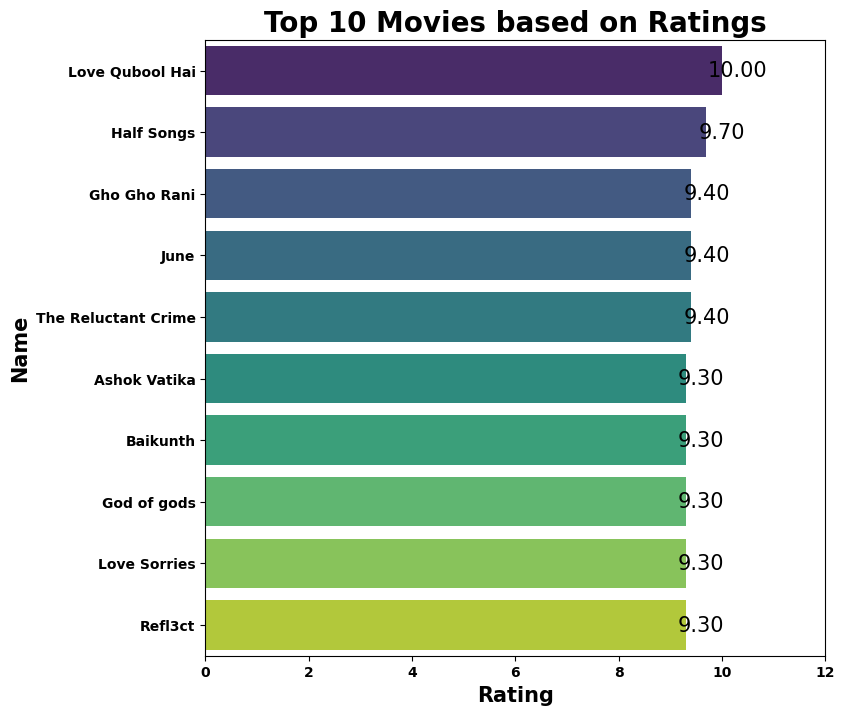

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 8))

# Sort the DataFrame by Rating and select the top 10 movies
top_movies = df[df['Year'] != 2022].nlargest(10, 'Rating')

# Create a bar chart
sns.barplot(x="Rating", y="Name", data=top_movies, palette='viridis')

# Add labels to the bars
for i, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', ha='center', va='center', size=15)

# Set labels and title
plt.xlabel("Rating", fontsize=15, fontweight='bold')
plt.ylabel("Name", fontsize=15, fontweight='bold')
plt.title("Top 10 Movies based on Ratings", fontsize=20, fontweight='bold')

# Customize ticks
plt.xticks(np.arange(0, 13, 2), fontweight='bold')
plt.yticks(fontweight='bold')

# Show the plot
plt.show()


top 10 genres

In [ ]:
genre_counts = {}

# Iterate through the 'Genre' column and count occurrences
for genres in df['Genre']:
    if genres is not None:
        for genre in genres.split(', '):
            if genre in genre_counts:
                genre_counts[genre] += 1
            else:
                genre_counts[genre] = 1

# Create a DataFrame from the dictionary
genre_counts_df = pd.DataFrame({'Genre': list(genre_counts.keys()), 'Count': list(genre_counts.values())})

# Sort the DataFrame by count in descending order
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Select the top 10 genres
top_10_genres = genre_counts_df.head(10)

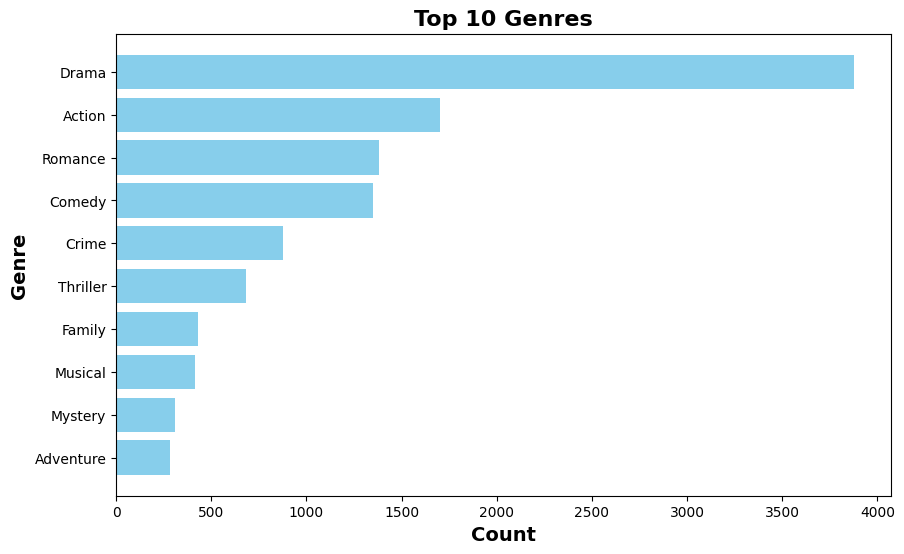

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_genres['Genre'], top_10_genres['Count'], color='skyblue')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')
plt.title('Top 10 Genres', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Reverse the order to show the highest count at the top
plt.show()

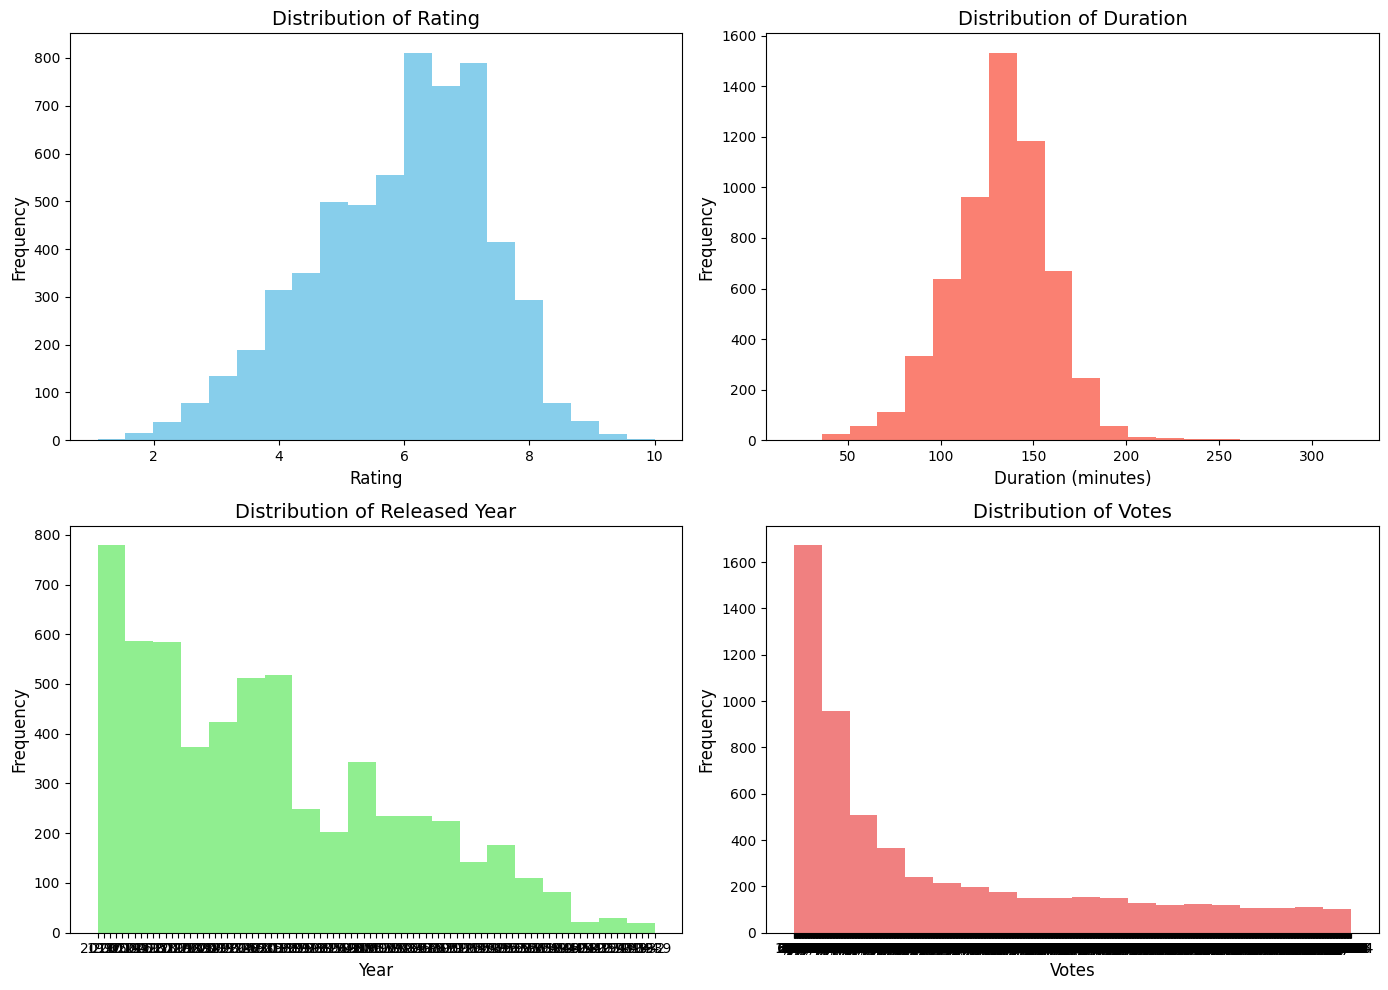

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot the distribution of Rating
axes[0, 0].hist(df['Rating'], bins=20, color='skyblue')
axes[0, 0].set_title('Distribution of Rating', fontsize=14)
axes[0, 0].set_xlabel('Rating', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

# Plot the distribution of Duration
axes[0, 1].hist(df['Duration'], bins=20, color='salmon')
axes[0, 1].set_title('Distribution of Duration', fontsize=14)
axes[0, 1].set_xlabel('Duration (minutes)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# Plot the distribution of Released Year
axes[1, 0].hist(df['Year'], bins=20, color='lightgreen')
axes[1, 0].set_title('Distribution of Released Year', fontsize=14)
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

# Plot the distribution of Votes
axes[1, 1].hist(df['Votes'], bins=20, color='lightcoral')
axes[1, 1].set_title('Distribution of Votes', fontsize=14)
axes[1, 1].set_xlabel('Votes', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
Input = df.drop(['Name', 'Genre', 'Rating', 'Director'], axis=1)
Output = df['Rating']

In [ ]:
Input.head(5)

,Year,Duration,Votes,Actor 1
1,2019,109.0,8,Rasika Dugal
3,2019,110.0,35,Prateik
5,1997,147.0,827,Bobby Deol
6,2005,142.0,"1,086",Jimmy Sheirgill
8,2012,82.0,326,Yash Dave


In [ ]:
Output.head(5)

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

Test Train Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

# Model Building

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*100))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*100, 2)

In [ ]:
# Remove commas from the 'Votes' column and convert it to float
x_train['Votes'] = x_train['Votes'].str.replace(',', '').astype(float)
x_test['Votes'] = x_test['Votes'].str.replace(',', '').astype(float)

In [ ]:
x_train = pd.get_dummies(x_train, columns=['Actor 1'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['Actor 1'], drop_first=True)

In [ ]:
x_train, x_test = x_train.align(x_test, join='inner', axis=1)

In [ ]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

In [ ]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = 7.75%
Mean Squared Error = 1.35

Model:  RANDOM FOREST
Accuracy = 22.48%
Mean Squared Error = 1.24

Model:  DECEISION TREE
Accuracy = -30.54%
Mean Squared Error = 1.60

Model:  GRADIENT BOOSTING
Accuracy = 27.15%
Mean Squared Error = 1.20

Model:  K NEAREST NEIGHBORS
Accuracy = 10.98%
Mean Squared Error = 1.32



In [ ]:
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Extended Gradient Boosting",  "K Nearest Neighbors"],
        "SCORES": [LRScore, RFScore, DTScore, GBScore, KNNScore]
    }
)
models.sort_values(by='SCORES', ascending=False)

,MODELS,SCORES
3,Extended Gradient Boosting,27.15
1,Random Forest,22.48
4,K Nearest Neighbors,10.98
0,Linear Regression,7.75
2,Decision Tree,-30.54
